# **Introduction**

Thank you [**Mr.Larxel**](https://www.kaggle.com/andrewmvd) for creating this very intersting Data. Hope you're doing well as always.

Okay, In this notebook, I'll create a Classification Model to predict Diabetes, and before we build our model, let me try to find some common features that associate with diabetic risk, okay, prepare your coffee, and let's get started.

Don't forget to upvote if you found this notebook useful, and don't forget to give me a feedback!

Sorry if my english is bad.

**regards,** <br>
**Azmi**

# **About this Dataset**

Diabetes is one of the fastest growing chronic life threatening diseases that have already affected $422$ million people worldwide according to the report of World Health Organization (WHO), in $2018$. Due to the presence of a relatively long asymptomatic phase, early detection of diabetes is always desired for a clinically meaningful outcome. Around $50$% of all people suffering from diabetes are undiagnosed because of its long-term asymptomatic phase.

This dataset contains $520$ observations with $17$ characteristics, collected using direct questionnaires and diagnosis results from the patients in the Sylhet Diabetes Hospital in Sylhet, Bangladesh.

**Data from:**

Islam M.M.F., Ferdousi R., Rahman S., Bushra H.Y. ($2020$) Likelihood Prediction of Diabetes at Early Stage Using Data Mining Techniques. In: Gupta M., Konar D., Bhattacharyya S., Biswas S. (eds) Computer Vision and Machine Intelligence in Medical Image Analysis. Advances in Intelligent Systems and Computing, vol $992$. Springer, Singapore. https://doi.org/10.1007/978-981-13-8798-2_12

# **Target**

Predict the Presence of Diabetes.

*Let's get started...*

# **Import Necessary Libraries**

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import warnings
import tensorflow as tf
from matplotlib import pylab as plt
from IPython.core.interactiveshell import InteractiveShell
from sklearn.metrics import confusion_matrix

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=Warning)
InteractiveShell.ast_node_interactivity = 'all'

%reload_ext autoreload
%autoreload 2

sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.5)
plt.style.use('fivethirtyeight')
pd.set_option("display.width", 100)
pd.set_option("display.max_columns", 25)
pd.set_option("display.max_rows", 25)

print(tf.__version__)
print("Setup complete!")

2.6.2
Setup complete!


# **Read in updated DataFrame**

Let's see the data and how it looks.

In [2]:
raw = "../input/early-diabetes-classification/diabetes_data.csv"
diabetes_data = pd.read_csv(raw, sep=";")
diabetes_data 

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,Female,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,Female,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,Female,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


Looks good... Let's continue..

# **Let's Check our data**

Let's check our data before we move on to the preprocessing steps...

In [3]:
# getting the information 
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    int64 
 3   polydipsia          520 non-null    int64 
 4   sudden_weight_loss  520 non-null    int64 
 5   weakness            520 non-null    int64 
 6   polyphagia          520 non-null    int64 
 7   genital_thrush      520 non-null    int64 
 8   visual_blurring     520 non-null    int64 
 9   itching             520 non-null    int64 
 10  irritability        520 non-null    int64 
 11  delayed_healing     520 non-null    int64 
 12  partial_paresis     520 non-null    int64 
 13  muscle_stiffness    520 non-null    int64 
 14  alopecia            520 non-null    int64 
 15  obesity             520 non-null    int64 
 16  class               520 no

### **Uniqueness Categorical Variables**
Let's have a look at categorical variables. How many unique values of these variables.

In [4]:
# Getting the uniqueness categorical variable
categorical = diabetes_data.select_dtypes(["category", "object"]).columns
for cat_col in categorical:
    print(f"{cat_col} : {diabetes_data[cat_col].nunique()} unique values(s)")

gender : 2 unique values(s)


Hmm, great...

How bout the discrete and continuous variables? Let's have a look.


#### **Discrete and Continuous Variables**
Let's have a look at Discrete and Continuous variables.

In [5]:
# Getting the uniqueness discrete and continuous variables
numeric = diabetes_data.select_dtypes(["int", "float"]).columns
for num_col in numeric: # print every unique values
    print(f"{num_col} : {diabetes_data[num_col].nunique()} unique values(s)")

age : 51 unique values(s)
polyuria : 2 unique values(s)
polydipsia : 2 unique values(s)
sudden_weight_loss : 2 unique values(s)
weakness : 2 unique values(s)
polyphagia : 2 unique values(s)
genital_thrush : 2 unique values(s)
visual_blurring : 2 unique values(s)
itching : 2 unique values(s)
irritability : 2 unique values(s)
delayed_healing : 2 unique values(s)
partial_paresis : 2 unique values(s)
muscle_stiffness : 2 unique values(s)
alopecia : 2 unique values(s)
obesity : 2 unique values(s)
class : 2 unique values(s)


### **Check the shape**

Let's check the shape, n-dimension of our data, also the features and the label... It's important to check the shape and dimension of our data... 

In [6]:
# Get the features and label form our data
features, label = diabetes_data.drop(columns=["class"]), diabetes_data["class"] 
print(f"Shape: {diabetes_data.shape}") # print-out the car shape
print(f"N-Dimension: {diabetes_data.ndim}") # print-out the car n-dimensional 
print(f"Features Shape: {features.shape}") # print-out the features shape
print(f"Features N-Dimension: {features.ndim}") # print-out the features n-dimension
print(f"Label Shape: {label.shape}") # print-out the label shape
print(f"Label N-Dimension: {label.ndim}") # print-out the label n-dimension

Shape: (520, 17)
N-Dimension: 2
Features Shape: (520, 16)
Features N-Dimension: 2
Label Shape: (520,)
Label N-Dimension: 1


### **Check the missing value**

Let's check the missing value...   

> **Question:** How many missing data points do we have?

Let's see how many we have in each column. 

In [7]:
# Get the number of missing data points per column
missing_values_count = diabetes_data.isnull().sum()
# Look at the missing points
missing_values_count.to_frame()

,0
age,0
gender,0
polyuria,0
polydipsia,0
sudden_weight_loss,0
weakness,0
polyphagia,0
genital_thrush,0
visual_blurring,0
itching,0


Great! our data is not have a missing value, then let's visualize our data!

# **EDA (Explanatory Data Analysis)**

In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

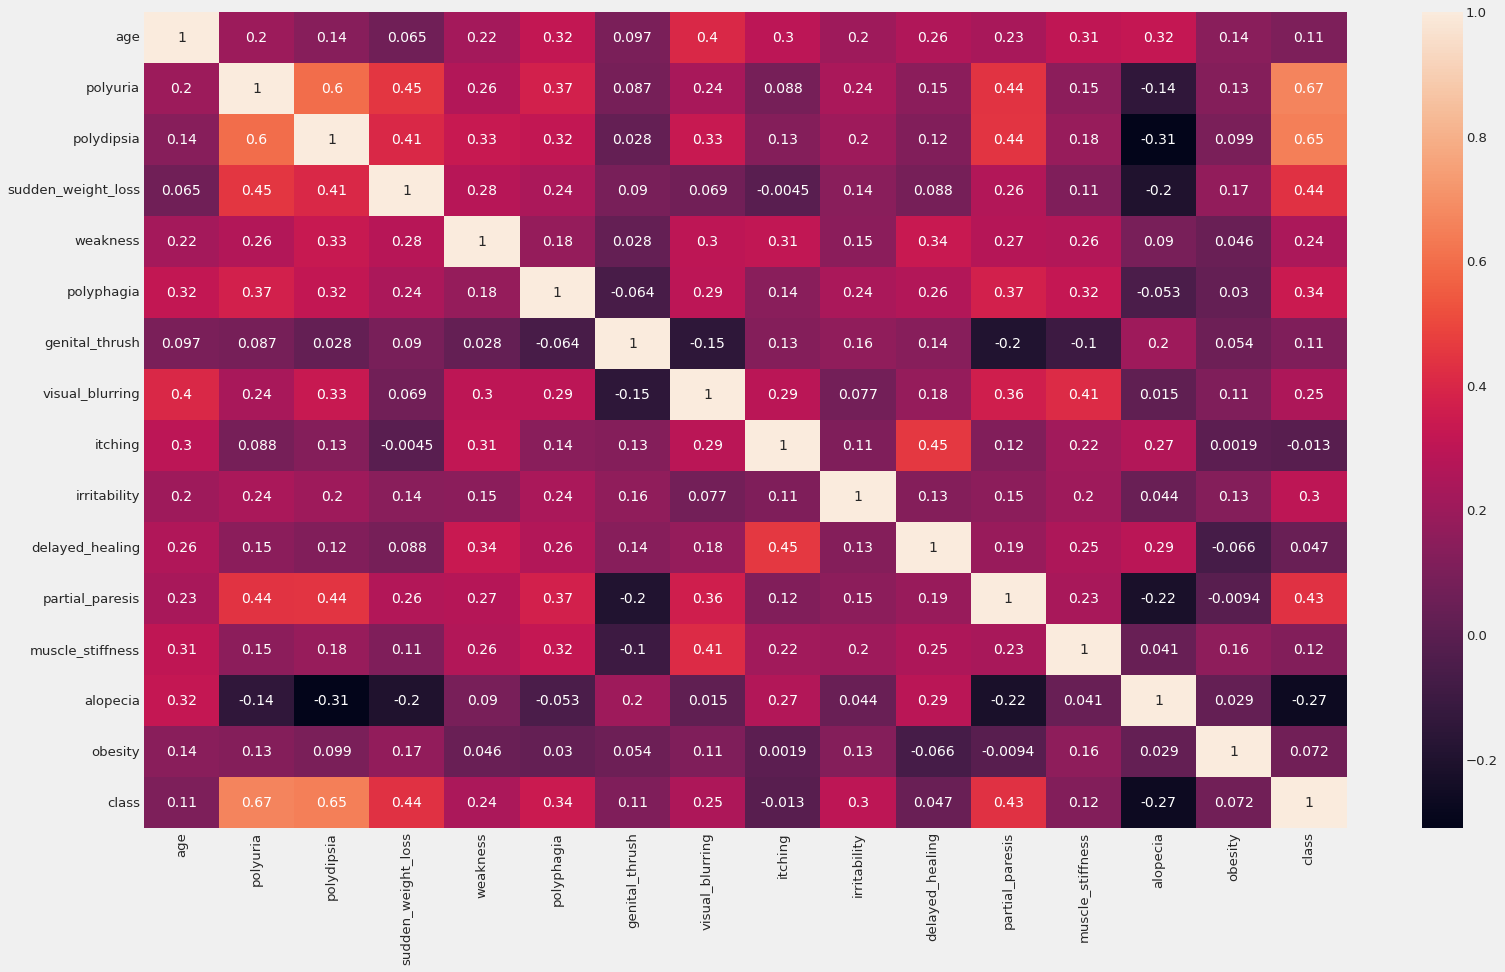

In [8]:
# let's make a correlation matrix
plt.figure(figsize=(24, 14))
sns.heatmap(diabetes_data.corr(), annot=True);

In [9]:
diabetes_data.corr()['class'].sort_values(ascending=False) # the correlation

class                 1.000000
polyuria              0.665922
polydipsia            0.648734
sudden_weight_loss    0.436568
partial_paresis       0.432288
polyphagia            0.342504
irritability          0.299467
visual_blurring       0.251300
weakness              0.243275
muscle_stiffness      0.122474
genital_thrush        0.110288
age                   0.108679
obesity               0.072173
delayed_healing       0.046980
itching              -0.013384
alopecia             -0.267512
Name: class, dtype: float64

We can see the features that associate with diabetic risk above... Let's check the skewness value

In [10]:
# checking skewness value
# if value lies between -0.5 to 0.5  then it is normal otherwise skewed
skew_value = diabetes_data.skew().sort_values(ascending=False)
skew_value

obesity               1.769420
genital_thrush        1.334223
irritability          1.206305
alopecia              0.657608
muscle_stiffness      0.517893
sudden_weight_loss    0.336359
age                   0.329359
partial_paresis       0.280426
polydipsia            0.209426
visual_blurring       0.209426
polyphagia            0.178134
delayed_healing       0.162537
itching               0.054022
polyuria              0.015430
weakness             -0.352476
class                -0.475715
dtype: float64

Okay great! 

## **Gender Distribution**

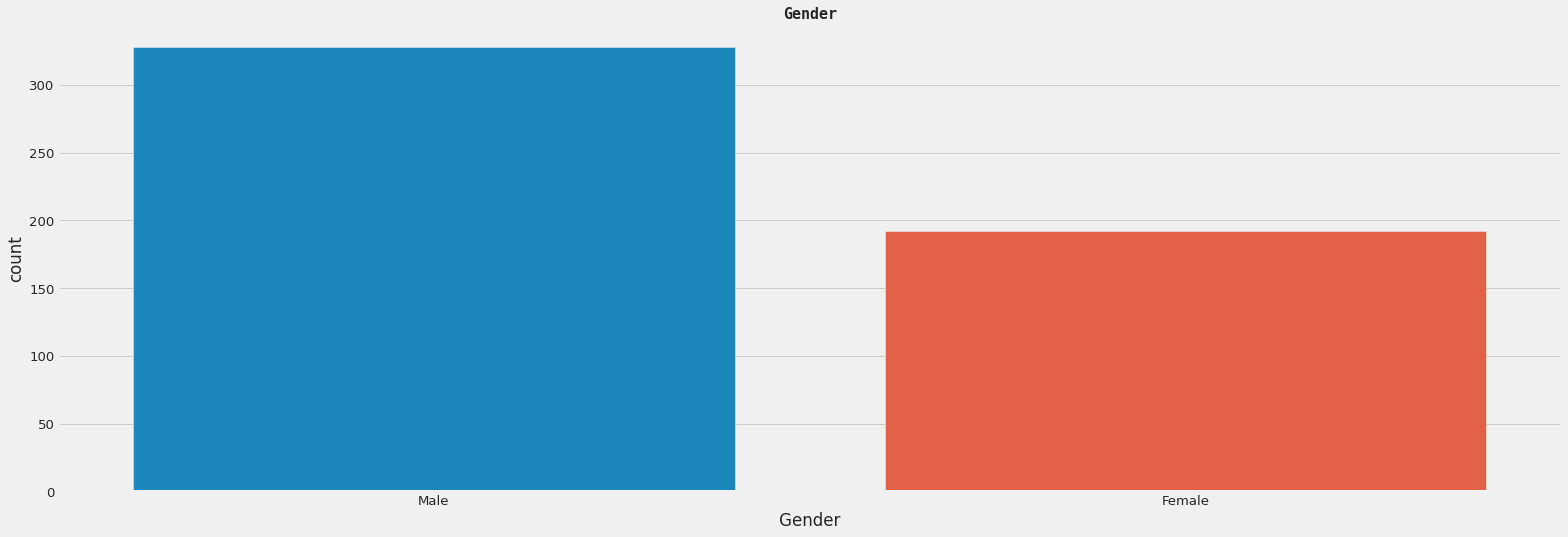

In [11]:
# let's plot it
plt.figure(figsize=(24, 8)) # figuring the size
# makes count plot 
sns.countplot(x='gender', data=diabetes_data)
# title
plt.title('Gender', fontname='monospace', fontweight='bold', fontsize=15)
# x-label
plt.xlabel('Gender');

Okay, the most distribution is Male...

## **Age distribution**

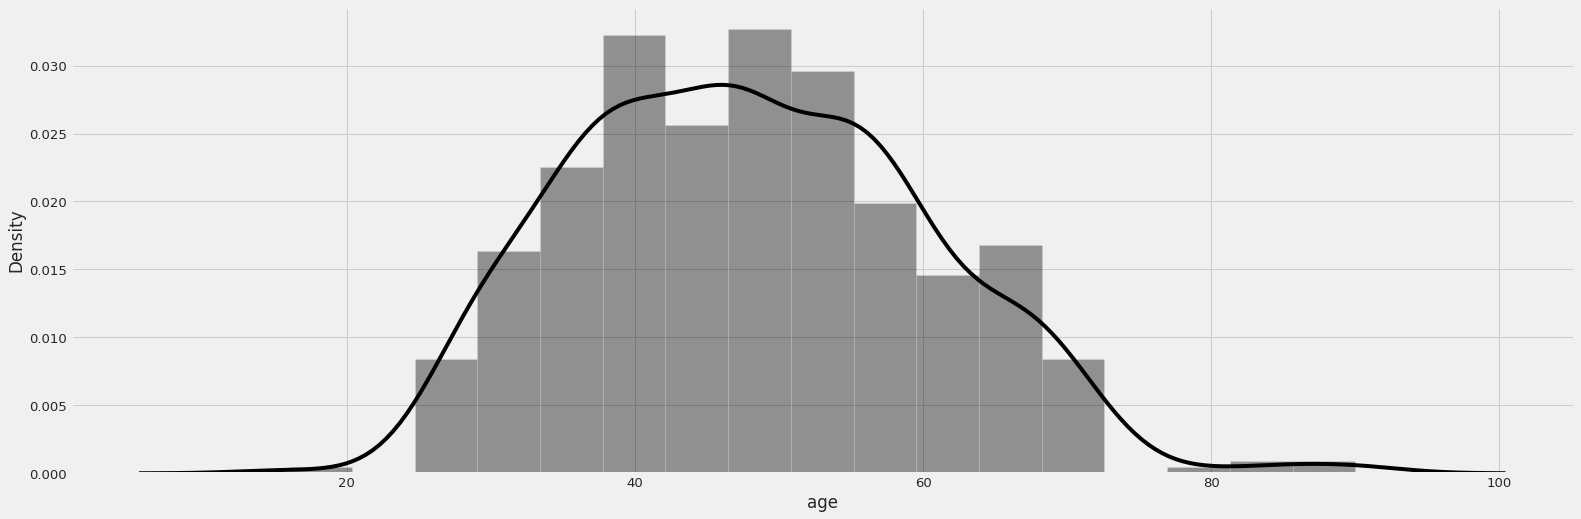

In [12]:
plt.figure(figsize=(24, 8))
sns.distplot(diabetes_data['age'], kde=True, color="black");

Okay, great, now let's move on to Data Preprocessing...

# **Data Preprocessing**

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

In [13]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

def preprocessing_data(data):
    """Returns Data that have been preprocessed and split"""
    # Create a columns transformer
    features_num = ["polyuria", "age", "polydipsia", "sudden_weight_loss", "weakness", \
                    "polyphagia", "genital_thrush", "visual_blurring", "itching", "irritability", \
                    "delayed_healing", "partial_paresis", "muscle_stiffness", "alopecia", "obesity"]
    features_cat = ['gender']

    preprocessor = make_column_transformer(
        (StandardScaler(), features_num),
        (OneHotEncoder(), features_cat),
    )
    
    # Create X & y (features and label)
    X = data.drop(columns=["class"])
    y = data["class"]
    
    # Build our train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Fit the columns transformer to our training data
    preprocessor.fit(X_train)
    
    # Transform training and test data with normalization (MinMaxScaler) and encoder (OneHotEncoder, LabelEncoder)
    X_train_normal = preprocessor.transform(X_train)
    X_test_normal = preprocessor.transform(X_test)
    
    # X_train and X_test (features)
    X_train, X_test = tf.constant(X_train_normal), tf.constant(X_test_normal)
    
    # y_train and y_test (label)
    y_train, y_test = tf.constant(y_train), tf.constant(y_test)
    
    return X_train, X_test, y_train, y_test

# Call the function
X_train, X_test, y_train, y_test = preprocessing_data(diabetes_data)
input_shape = [X_train.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [17]



User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [14]:
# Checking the shape and dimension of rows and columns (features)
X_train.shape, X_test.shape, X_train.ndim, X_test.ndim

(TensorShape([416, 17]), TensorShape([104, 17]), 2, 2)

In [15]:
# Checking the shape and dimension of rows and columns (label)
y_train.shape, y_test.shape, y_train.ndim, y_test.ndim

(TensorShape([416]), TensorShape([104]), 1, 1)

In [16]:
# Checking the type (features and label)
X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype

(tf.float64, tf.float64, tf.int64, tf.int64)

In [17]:
# Checking the len (feature and label)
len(X_train), len(X_test), len(y_train), len(y_test)

(416, 104, 416, 104)

# **Okay, Let's build the Model**

## Steps in modelling

Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the [functional](https://www.tensorflow.org/guide/keras/functional) or [sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer). 
3. **Fitting a model** - letting the model try to find patterns in the data (how does `X` get to `y`). 

Let's see these in action using the Sequential API to build a model for our regression data. And then we'll step through each.

## **Typical architecture of a classification neural network**

The word *typical* is on purpose.

Because the architecture of a classification neural network can widely vary depending on the problem you're working on.

However, there are some fundamentals all deep neural networks contain:
* An input layer.
* Some hidden layers.
* An output layer.

Much of the rest is up to the data analyst creating the model.

The following are some standard values you'll often use in your classification neural networks.

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| Input layer shape | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, generally 10 to 100 | Same as binary classification |
| Output layer shape | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) | Same as binary classification |
| Output activation | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) |
| Loss function | [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`tf.keras.losses.BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) in TensorFlow) | Cross entropy ([`tf.keras.losses.CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) in TensorFlow) |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) | Same as binary classification |

***Table 1:*** *Typical architecture of a classification network.* ***Source:*** *Adapted from page 295 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

In [18]:
# Set the random seed
tf.random.set_seed(42)

def model():
    # Create the model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation="relu", input_shape=input_shape, name="input_1"),
        tf.keras.layers.Dropout(rate=0.3),
        tf.keras.layers.Dense(128, activation="relu", name="input_2"),
        tf.keras.layers.Dropout(rate=0.3),
        tf.keras.layers.Dense(1, activation="sigmoid", name="output_layer")
    ], name="our_model")

    # Compile the model
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['accuracy'])
    
    return model

model = model()

# Fit the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100,
    verbose=1,
)

2021-12-06 23:15:51.346492: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
13/13 [==============================] - 1s 21ms/step - loss: 0.5467 - accuracy: 0.7812 - val_loss: 0.3886 - val_accuracy: 0.8558
Epoch 2/100
13/13 [==============================] - 0s 8ms/step - loss: 0.3505 - accuracy: 0.9038 - val_loss: 0.2973 - val_accuracy: 0.8846
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.2860 - accuracy: 0.8966 - val_loss: 0.2610 - val_accuracy: 0.8846
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.2205 - accuracy: 0.9255 - val_loss: 0.2282 - val_accuracy: 0.8942
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 0.2143 - accuracy: 0.9279 - val_loss: 0.2101 - val_accuracy: 0.9038
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1690 - accuracy: 0.9399 - val_loss: 0.1950 - val_accuracy: 0.9038
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1567 - accuracy: 0.9471 - val_loss: 0.1878 - val_accuracy: 0.9038
Epoch 8/100


Looks like our model is good! let's see its Architecture...

In [19]:
model.summary()

Model: "our_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (Dense)              (None, 128)               2304      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
input_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 129       
Total params: 18,945
Trainable params: 18,945
Non-trainable params: 0
_________________________________________________________________


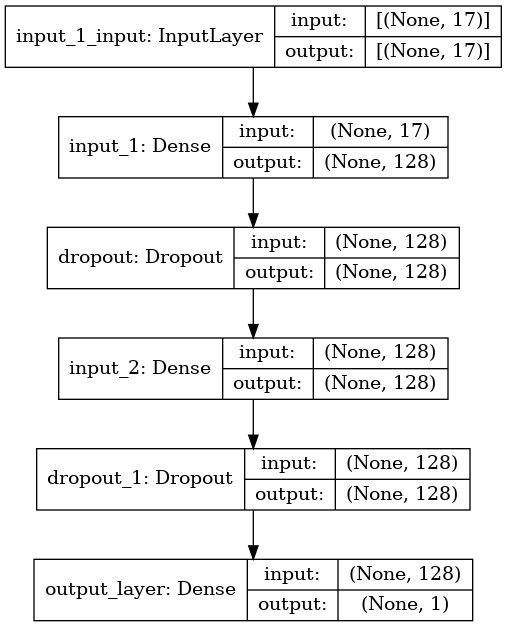

In [20]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

# **Let's Evaluate it**

## **History Curves**

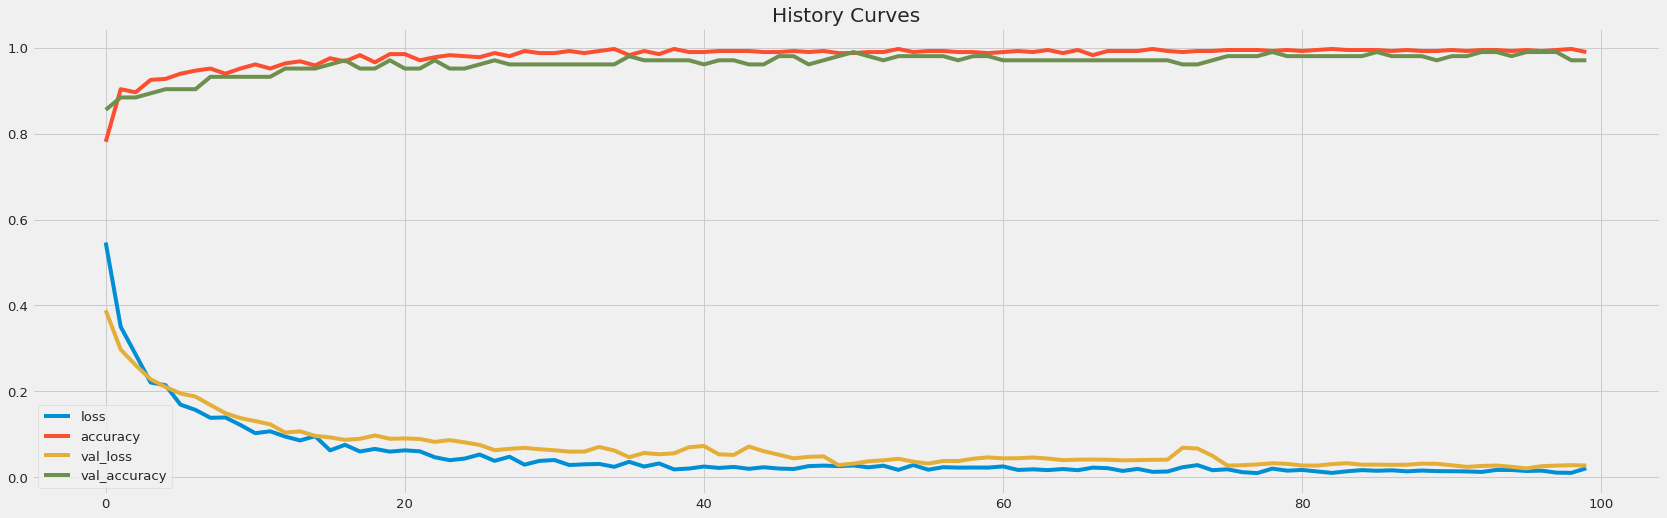

In [21]:
pd.DataFrame(history.history).plot(figsize=(26, 8), title="History Curves");

In [22]:
# Check kthe accuracy of our model
y_pred = model.predict(X_test)
loss, accuracy = model.evaluate(X_test, y_test)
print(f"y_pred: {y_pred[0]}")
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

4/4 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9712
y_pred: [1.4569774e-07]
Model loss on the test set: 0.02716439589858055
Model accuracy on the test set: 97.12%


Looks like our model is good!

### **Let's plot the Confusion Matrix**

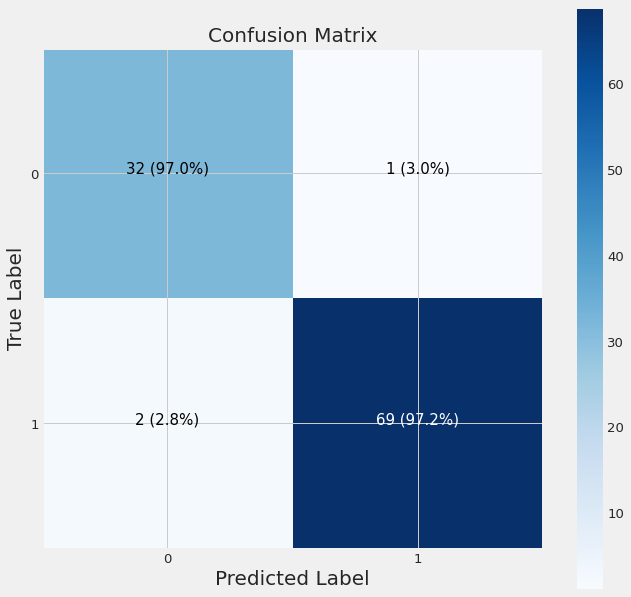

In [23]:
# Note: the confusion matrix code we're about to ride is a remix of scikit-learn's plot confusion matrix function
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_pred))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it 
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes= False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])
    
# Label the axes
ax.set(
    title='Confusion Matrix',
    xlabel='Predicted Label',
    ylabel='True Label',
    xticks=np.arange(n_classes),
    yticks=np.arange(n_classes),
    xticklabels=labels,
    yticklabels=labels
)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust the label size 
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set the threshold for diffenrent colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
             horizontalalignment='center',
             color='white' if cm[i, j] > threshold else 'black',
             size=15);
fig.show();

# **On Going...**

#### **Next Updates will add More EDA, wait for it...**